In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from tqdm import tqdm

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
zomato = pd.read_csv('./data/zomato_preprocessed.csv')
zomato = zomato.assign(order_time=pd.to_datetime(zomato['order_time']))
zomato

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City,pay_amount,is_consistent,afford_ratio,is_gold
0,543991243,2021-09-01 00:00:51,ygyH_eaSHCTSSgAda33qDLYA,False,True,NaN,NaN,NaN,TGO,67.43,...,False,False,False,True,13.486,Chennai,53.944,False,20.0,False
1,543992115,2021-09-01 00:02:50,vagdCBP6L9S461DAPk0tNs-A,False,True,NaN,NaN,NaN,TGO,53.50,...,False,False,False,True,NaN,Mumbai,53.500,True,NaN,False
2,543992763,2021-09-01 00:04:26,65RUZmnykIRzyWaqnOaB_EdQ,False,False,LATE_DELIVERY,NaN,VENDOR,TGO,72.99,...,False,False,False,False,NaN,Chennai,72.990,True,NaN,False
3,543993755,2021-09-01 00:06:41,THNssTsOurRqOJf9sQEhwiRg,False,True,NaN,NaN,NaN,TGO,206.00,...,False,False,False,False,NaN,Chennai,206.000,True,NaN,False
4,543994010,2021-09-01 00:07:13,OGX49Bsq0pR5qB32sT83JhSg,False,True,NaN,NaN,NaN,TGO,100.99,...,False,False,False,False,NaN,Chennai,100.990,True,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118278,644315564,2022-01-02 23:57:08,xdSbyNHiYORwiK2AHYieL5UQ,False,False,CUSTOMER_MISTAKE_ERROR,Changed mind - Mistake / Error,CUSTOMER,TGO,147.49,...,False,False,False,False,NaN,Chennai,147.490,True,NaN,False
118279,644315682,2022-01-02 23:57:25,AYeFPGmOUyT4OIWfmTSCYikw,False,True,NaN,NaN,NaN,TGO,110.49,...,False,False,False,False,NaN,Coimbatore,110.490,True,NaN,False
118280,644316048,2022-01-02 23:58:05,COnO0tda5iSTa-t5dFFVTpwg,False,False,ONLINE_PAYMENT,NaN,CUSTOMER/PLATFORM,TGO,112.49,...,False,False,False,False,NaN,Chennai,112.490,True,NaN,False
118281,644316064,2022-01-02 23:58:07,iI6rRPz2LkRi2Ct0zTaksrOA,False,True,NaN,NaN,NaN,TGO,739.24,...,False,False,False,False,NaN,Chennai,739.240,True,NaN,False


In [62]:
zomato.isnull().sum()

order_id                           0
order_time                         0
analytical_customer_id             0
is_acquisition                     0
is_successful                      0
reason                         98567
sub_reason                    109935
owner                          98567
delivery_arrangement               0
gmv_amount_lc                      0
basket_amount_lc                   0
delivery_fee_amount_lc             0
Payment Method                     0
actual_delivery_time           36081
promised_delivery_time         36081
order_delay                    43371
dropoff_distance_manhattan     36082
platform                           0
vertical_class                     0
vertical                           0
is_affordable_freedelivery         0
is_affordable_item                 0
is_affordable_gem                  0
is_affordable_restaurant           0
is_affordable_voucher              0
is_affordable                      0
affordability_amt_total        88154
C

# Success vs Failed

In [3]:
success_delivery = zomato[zomato['is_successful']==True]
failed_delivery = zomato[zomato['is_successful']==False]

In [4]:
print(success_delivery.shape[0])
print(failed_delivery.shape[0])

98567
19716


In [5]:
display(zomato.is_acquisition.value_counts(normalize=True))
display(zomato.is_successful.value_counts(normalize=True))

False    0.969607
True     0.030393
Name: is_acquisition, dtype: float64

True     0.833315
False    0.166685
Name: is_successful, dtype: float64

In [6]:
delivery_arrangement = pd.concat([success_delivery.delivery_arrangement.value_counts(normalize=True)*100, 
                                  failed_delivery.delivery_arrangement.value_counts(normalize=True)*100], axis=1).round(2)
delivery_arrangement.columns = ['ratio_success', 'ratio_failed']
delivery_arrangement

,ratio_success,ratio_failed
TGO,77.57,77.91
TMP,22.43,22.09


In [7]:
delivery_platform = pd.concat([success_delivery.platform.value_counts(normalize=True)*100, 
                               failed_delivery.platform.value_counts(normalize=True)*100], axis=1).round(2)
delivery_platform.columns = ['ratio_success', 'ratio_failed']
delivery_platform

,ratio_success,ratio_failed
android,51.28,51.83
iOS,47.34,47.19
desktop web,0.88,0.58
mobile web,0.50,0.41


# TGO vs TMP

In [8]:
failed_delivery_TGO = failed_delivery[failed_delivery['delivery_arrangement']=='TGO']
failed_delivery_TMP = failed_delivery[failed_delivery['delivery_arrangement']=='TMP']

In [9]:
failed_delivery_reason = pd.concat([failed_delivery_TGO.reason.value_counts(normalize=True)*100, failed_delivery_TMP.reason.value_counts(normalize=True)*100], axis=1).round(2)
failed_delivery_reason.columns = ['ratio_TGO', 'ratio_TMP']
failed_delivery_reason = failed_delivery_reason.sort_values('ratio_TGO')

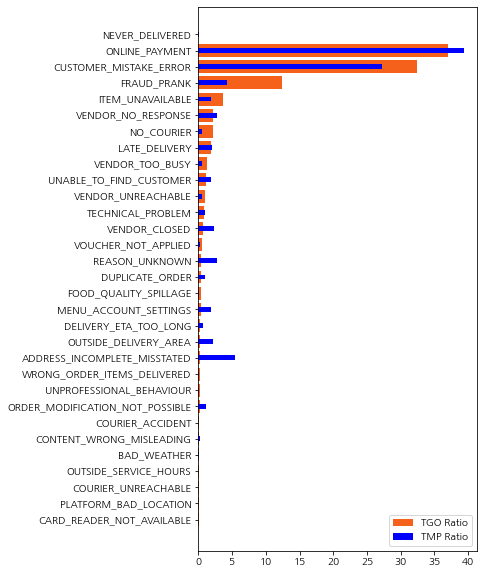

In [10]:
plt.figure(figsize=(5,10))
plt.barh(failed_delivery_reason['ratio_TGO'].index, failed_delivery_reason['ratio_TGO'].values, color='#f5611a', label='TGO Ratio')
plt.barh(failed_delivery_reason['ratio_TMP'].index, failed_delivery_reason['ratio_TMP'].values, height=0.3, color='b', label='TMP Ratio')
plt.legend(loc='lower right')
plt.show()

In [11]:
failed_delivery_sub_reason = pd.concat([failed_delivery_TGO.sub_reason.value_counts(normalize=True)*100, failed_delivery_TMP.sub_reason.value_counts(normalize=True)*100], axis=1).round(2)
failed_delivery_sub_reason.columns = ['ratio_TGO', 'ratio_TMP']
failed_delivery_sub_reason  = failed_delivery_sub_reason.sort_values('ratio_TGO')

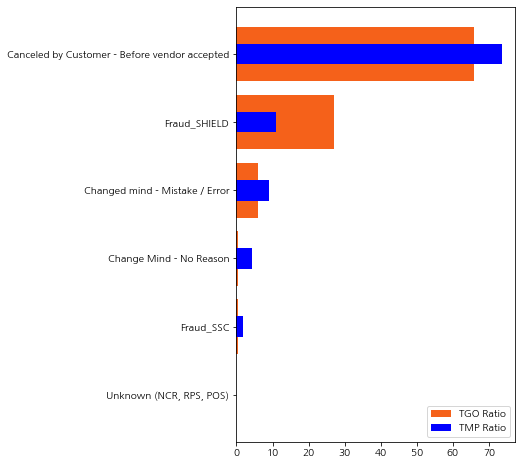

In [12]:
plt.figure(figsize=(5,8))
plt.barh(failed_delivery_sub_reason['ratio_TGO'].index, failed_delivery_sub_reason['ratio_TGO'].values, color='#f5611a', label='TGO Ratio')
plt.barh(failed_delivery_sub_reason['ratio_TMP'].index, failed_delivery_sub_reason['ratio_TMP'].values, height=0.3, color='b', label='TMP Ratio')
plt.legend(loc='lower right')
plt.show()

In [13]:
failed_delivery_owner = pd.concat([failed_delivery_TGO.owner.value_counts(normalize=True)*100, failed_delivery_TMP.owner.value_counts(normalize=True)*100], axis=1).round(2)
failed_delivery_owner.columns = ['ratio_TGO', 'ratio_TMP']
failed_delivery_owner = failed_delivery_owner.sort_values('ratio_TGO')

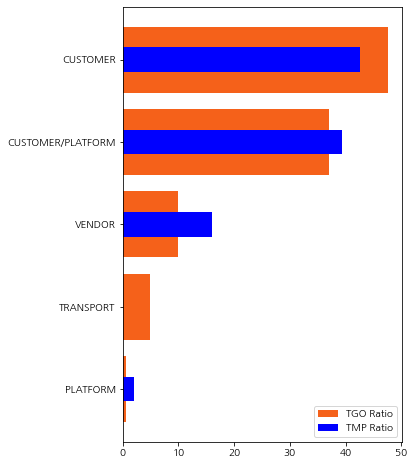

In [14]:
plt.figure(figsize=(5,8))
plt.barh(failed_delivery_owner['ratio_TGO'].index, failed_delivery_owner['ratio_TGO'].values, color='#f5611a', label='TGO Ratio')
plt.barh(failed_delivery_owner['ratio_TMP'].index, failed_delivery_owner['ratio_TMP'].values, height=0.3, color='b', label='TMP Ratio')
plt.legend(loc='lower right')
plt.show()

# By Owner

In [15]:
pd.crosstab(failed_delivery['reason'], failed_delivery['owner'], margins=True)

owner,CUSTOMER,CUSTOMER/PLATFORM,PLATFORM,TRANSPORT,VENDOR,All
reason,,,,,,
ADDRESS_INCOMPLETE_MISSTATED,272,0,0,0,0,272
BAD_WEATHER,0,0,0,3,6,9
CARD_READER_NOT_AVAILABLE,0,0,0,1,0,1
CONTENT_WRONG_MISLEADING,0,0,0,0,16,16
COURIER_ACCIDENT,0,0,0,9,0,9
COURIER_UNREACHABLE,0,0,0,2,0,2
CUSTOMER_MISTAKE_ERROR,6161,0,0,0,0,6161
DELIVERY_ETA_TOO_LONG,30,0,0,21,26,77
DUPLICATE_ORDER,97,0,0,0,0,97


In [16]:
owner_VENDOR = failed_delivery[failed_delivery['owner']=='VENDOR']
owner_CUSTOMER = failed_delivery[failed_delivery['owner']=='CUSTOMER']
owner_TRANSPORT = failed_delivery[failed_delivery['owner']=='TRANSPORT']
owner_PLATFORM = failed_delivery[failed_delivery['owner']=='PLATFORM']
owner_CUSTOMER_PLATFORM = failed_delivery[failed_delivery['owner']=='CUSTOMER/PLATFORM']

owner_df_list = [owner_VENDOR, owner_CUSTOMER, owner_TRANSPORT, owner_PLATFORM, owner_CUSTOMER_PLATFORM]
color_list = ['r', 'b', 'g', 'm', 'c']

In [17]:
owner_VENDOR['owner'].iloc[0]

'VENDOR'

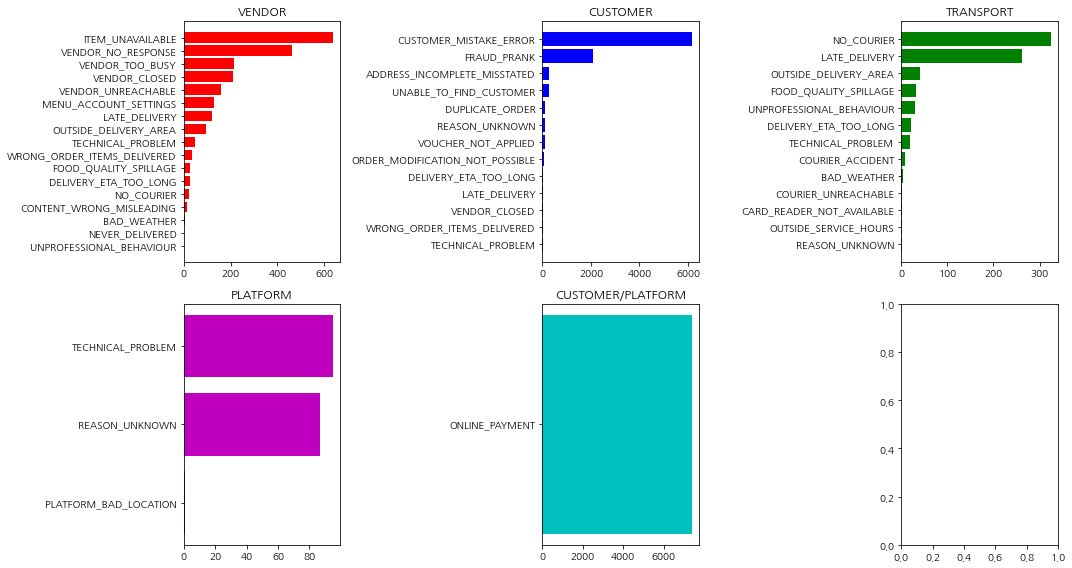

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))

for owner, ax, color in zip(owner_df_list, axes.ravel(), color_list) : 
    reason_count = owner['reason'].value_counts().sort_values(ascending=True)
    ax.barh(reason_count.index, reason_count.values, color=color)
    ax.set_title(owner['owner'].iloc[0])
plt.tight_layout()
plt.show()

In [19]:
zomato = zomato.assign(dropoff_distance_manhattan=zomato['dropoff_distance_manhattan']/1000)
zomato = zomato.assign(promised_delivery_time=zomato['promised_delivery_time']/60)
zomato = zomato.assign(order_delay=zomato['order_delay']/60)
zomato = zomato.assign(actual_delivery_time=zomato['actual_delivery_time']/60)

In [20]:
zomato[['order_time', 'dropoff_distance_manhattan', 'promised_delivery_time', 'order_delay', 'actual_delivery_time']].describe()

,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
count,82201.000000,82202.000000,74912.000000,82202.000000
mean,2.254706,33.532437,-3.031079,28.506779
std,73.434556,24.771314,12.105990,21.125203
min,0.000000,0.983333,-70.633333,0.000000
25%,0.757000,26.983333,-10.333333,18.083333
50%,1.505000,32.983333,-4.900000,26.433333
75%,2.622000,38.983333,1.900000,36.333333
max,16364.616000,2878.333333,182.316667,2887.966667


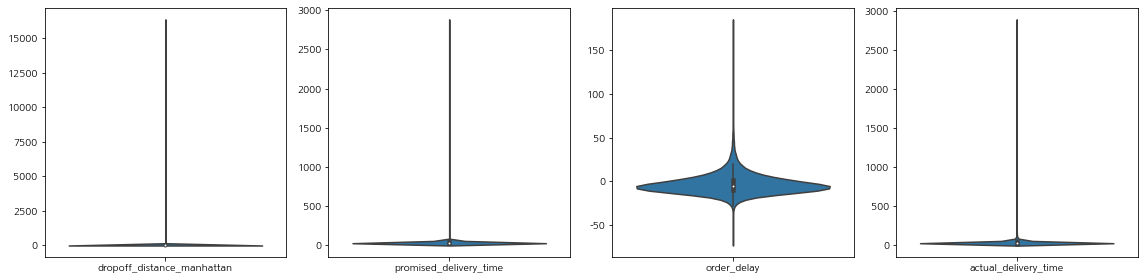

In [57]:
fig, axes = plt.subplots(1,4, figsize=(16,4))

sns.violinplot(zomato['dropoff_distance_manhattan'], ax=axes[0])
sns.violinplot(zomato['promised_delivery_time'], ax=axes[1])
sns.violinplot(zomato['order_delay'], ax=axes[2])
sns.violinplot(zomato['actual_delivery_time'], ax=axes[3])

axes[0].set_xticks([0], ['dropoff_distance_manhattan'])
axes[1].set_xticks([0], ['promised_delivery_time'])
axes[2].set_xticks([0], ['order_delay'])
axes[3].set_xticks([0], ['actual_delivery_time'])

plt.tight_layout()
plt.show()

In [58]:
zomato[zomato['dropoff_distance_manhattan']>100][['order_time', 'dropoff_distance_manhattan', 'promised_delivery_time', 'order_delay', 'actual_delivery_time']]

,order_time,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
46629,2021-10-19 14:27:27,203.530,25.116667,6.5,31.616667
83711,2021-11-26 21:51:25,16364.616,48.933333,NaN,51.033333
107024,2021-12-22 12:25:13,13240.805,52.266667,2.9,55.166667


In [59]:
zomato[zomato['promised_delivery_time']>120][['order_time', 'dropoff_distance_manhattan', 'promised_delivery_time', 'order_delay', 'actual_delivery_time']]

,order_time,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
1119,2021-09-02 10:17:06,5.896,312.450000,14.066667,326.516667
2173,2021-09-03 11:29:43,1.287,134.866667,5.533333,140.400000
2175,2021-09-03 11:35:01,6.917,204.450000,3.650000,208.100000
3276,2021-09-04 14:29:10,0.000,180.450000,NaN,0.000000
4682,2021-09-05 19:51:14,NaN,2878.333333,9.633333,2887.966667
10885,2021-09-12 12:10:17,0.000,229.233333,NaN,0.000000
11847,2021-09-13 13:14:09,0.000,285.283333,NaN,0.000000
12049,2021-09-13 16:18:06,0.606,131.433333,3.333333,134.766667
12366,2021-09-13 20:44:11,1.003,1385.283333,-11.016667,1374.266667
13275,2021-09-14 19:12:53,0.302,151.300000,-9.183333,142.116667


In [60]:
zomato[zomato['actual_delivery_time']>120][['order_time', 'dropoff_distance_manhattan', 'promised_delivery_time', 'order_delay', 'actual_delivery_time']]

,order_time,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
1119,2021-09-02 10:17:06,5.896,312.450000,14.066667,326.516667
1468,2021-09-02 17:03:59,0.778,47.983333,NaN,132.216667
1651,2021-09-02 19:29:42,5.012,45.983333,88.950000,134.933333
2173,2021-09-03 11:29:43,1.287,134.866667,5.533333,140.400000
2175,2021-09-03 11:35:01,6.917,204.450000,3.650000,208.100000
...,...,...,...,...,...
116741,2022-01-01 15:12:15,5.029,54.983333,82.116667,137.100000
116847,2022-01-01 16:32:40,4.979,61.750000,NaN,127.200000
117760,2022-01-02 16:08:49,2.950,46.983333,73.483333,120.466667
118042,2022-01-02 20:04:57,4.192,42.983333,96.150000,139.133333


In [ ]:
zomato

In [47]:
zomato.columns

Index(['order_id', 'order_time', 'analytical_customer_id', 'is_acquisition',
       'is_successful', 'reason', 'sub_reason', 'owner',
       'delivery_arrangement', 'gmv_amount_lc', 'basket_amount_lc',
       'delivery_fee_amount_lc', 'Payment Method', 'actual_delivery_time',
       'promised_delivery_time', 'order_delay', 'dropoff_distance_manhattan',
       'platform', 'vertical_class', 'vertical', 'is_affordable_freedelivery',
       'is_affordable_item', 'is_affordable_gem', 'is_affordable_restaurant',
       'is_affordable_voucher', 'is_affordable', 'affordability_amt_total',
       'City', 'pay_amount', 'is_consistent', 'afford_ratio', 'is_gold'],
      dtype='object')

In [56]:
zomato[zomato['reason']=='LATE_DELIVERY'][['is_successful', 'reason', 'sub_reason', 'order_time', 'dropoff_distance_manhattan', 'promised_delivery_time', 'order_delay', 'actual_delivery_time']]

,is_successful,reason,sub_reason,order_time,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
2,False,LATE_DELIVERY,NaN,2021-09-01 00:04:26,0.009,31.983333,23.266667,55.250000
256,False,LATE_DELIVERY,NaN,2021-09-01 13:40:48,0.000,26.983333,NaN,0.000000
581,False,LATE_DELIVERY,NaN,2021-09-01 18:41:08,0.000,31.983333,NaN,0.000000
1206,False,LATE_DELIVERY,NaN,2021-09-02 13:11:09,0.000,41.983333,NaN,0.000000
1385,False,LATE_DELIVERY,NaN,2021-09-02 15:56:28,0.000,36.983333,NaN,0.000000
...,...,...,...,...,...,...,...,...
116810,False,LATE_DELIVERY,NaN,2022-01-01 16:07:21,0.000,63.983333,NaN,102.933333
117198,False,LATE_DELIVERY,NaN,2022-01-01 21:40:22,0.000,67.983333,NaN,0.000000
117287,False,LATE_DELIVERY,NaN,2022-01-01 23:02:07,0.000,66.983333,NaN,0.000000
117295,False,LATE_DELIVERY,NaN,2022-01-01 23:06:56,1.157,37.983333,52.383333,90.366667


In [54]:
zomato[(zomato['actual_delivery_time']>120)&(zomato['is_successful']==False)][['is_successful', 'reason', 'sub_reason', 'order_time', 'dropoff_distance_manhattan', 'promised_delivery_time', 'order_delay', 'actual_delivery_time']]

,is_successful,reason,sub_reason,order_time,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
4749,False,TECHNICAL_PROBLEM,NaN,2021-09-05 20:39:19,1.739,36.983333,94.700000,131.683333
12986,False,LATE_DELIVERY,NaN,2021-09-14 14:54:34,0.255,19.983333,NaN,154.633333
23193,False,UNABLE_TO_FIND_CUSTOMER,NaN,2021-09-24 22:14:17,0.847,32.983333,NaN,132.950000
37615,False,LATE_DELIVERY,NaN,2021-10-09 21:47:47,8.508,59.983333,NaN,143.966667
77952,False,LATE_DELIVERY,NaN,2021-11-20 20:33:23,1.069,36.983333,134.883333,171.866667
78011,False,LATE_DELIVERY,NaN,2021-11-20 21:20:13,0.014,46.983333,116.316667,163.300000
82492,False,LATE_DELIVERY,NaN,2021-11-25 18:45:59,1.369,47.983333,NaN,125.050000
86386,False,LATE_DELIVERY,NaN,2021-11-29 22:39:34,0.710,28.983333,136.333333,165.316667
93575,False,LATE_DELIVERY,NaN,2021-12-07 20:32:00,2.711,55.983333,69.383333,125.366667
93872,False,LATE_DELIVERY,NaN,2021-12-08 04:47:02,4.545,41.983333,163.733333,205.716667


In [25]:
delivery_des = zomato[['order_time', 'dropoff_distance_manhattan', 'promised_delivery_time', 'order_delay', 'actual_delivery_time']].describe()

Q1 = delivery_des[delivery_des.index=='25%'].reset_index(drop=True)
Q3 = delivery_des[delivery_des.index=='75%'].reset_index(drop=True)
IQR = Q3 - Q1

iqr_upper_3 = Q3 + (3.0*IQR)
iqr_lower_3 = Q1 - (3.0*IQR)

iqr_upper_1_5 = Q3 + (1.5*IQR)
iqr_lower_1_5 = Q1 - (1.5*IQR)

In [26]:
mean_value = delivery_des[delivery_des.index=='mean'].reset_index(drop=True)
std_value = delivery_des[delivery_des.index=='std'].reset_index(drop=True)

z_score_upper = mean_value + (3 * std_value)
z_score_lower = mean_value - (3 * std_value)

In [27]:
display(iqr_upper_1_5)
display(iqr_lower_1_5)

,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
0,0.054195,56.983333,20.25,63.708333


,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
0,-0.020405,8.983333,-28.683333,-9.291667


In [28]:
display(iqr_upper_3)
display(iqr_lower_3)

,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
0,0.08217,74.983333,38.6,91.083333


,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
0,-0.04838,-9.016667,-47.033333,-36.666667


In [29]:
display(z_score_upper)
display(z_score_lower)

,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
0,2.225584,107.846379,33.286893,91.882388


,dropoff_distance_manhattan,promised_delivery_time,order_delay,actual_delivery_time
0,-2.18049,-40.781505,-39.34905,-34.86883
